# Group Assignment

### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import datetime as dt
import pandas_datareader.data as web

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from scipy.optimize import minimize
from scipy import stats

import statsmodels.api as sm

## PART I

## Examination of the January Effect
### The January Effect's main hypothesis states that stock returns are, on average, higher during January than during other months.

### 1. Download pricing data from Yahoo!Finance for each of the stocks in the ticker_list below and compute the continuously compounded daily returns using the Adjusted Closing price. Store these daily returns in a DataFrame called returns. Label the columns as 'RET_ticker', where ticker represents the trading symbol of the stock whose returns are stored in that column.

In [2]:
ticker_list = ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO',
            'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM']

In [3]:
yahoo = web.DataReader(ticker_list, 'yahoo')


In [4]:
yahoo.head()

Attributes   Adj Close                                               \
Symbols           AAPL        AXP          BA        CAT       CSCO   
Date                                                                  
2015-04-06  117.195030  73.453651  131.805084  68.835617  23.205484   
2015-04-07  115.961906  72.254478  133.018997  68.033157  23.350412   
2015-04-08  115.584587  72.586555  133.927216  67.948685  23.486820   
2015-04-09  116.468048  73.020088  133.979599  68.151405  23.555017   
2015-04-10  116.964989  73.416710  134.817978  69.773262  23.904549   

Attributes                                                            ...  \
Symbols           CVX        DIS          GS          HD         IBM  ...   
Date                                                                  ...   
2015-04-06  86.980110  98.448570  177.621933  102.511871  130.132080  ...   
2015-04-07  88.297997  98.262169  177.936371  101.932228  130.156174  ...   
2015-04-08  86.768608  99.128952  178.093628  103.082649  129.979523  ...   
2015-04-09  87.004524  99.511070  180.248581  102.173004  130.372986  ...   
2015-04-10  86.971970  99.678848  180.942215  102.770508  130.790588  ...   

Attributes     Volume                                                          \
Symbols           NKE         PFE         PG        TRV        UNH        UTX   
Date                                                                            
2015-04-06  5027400.0  21480500.0  6856300.0  1052700.0  2544700.0  2857300.0   
2015-04-07  3993600.0  14331200.0  6329900.0  1363300.0  2528500.0  2269100.0   
2015-04-08  6522400.0  22974500.0  6523400.0  1544000.0  2627000.0  2484100.0   
2015-04-09  5301000.0  29283200.0  6185000.0  1217800.0  2247200.0  2088400.0   
2015-04-10  5918200.0  24353700.0  7001700.0  1699900.0  2232600.0  2254700.0   

Attributes                                                
Symbols             V          VZ        WMT         XOM  
Date                                                      
2015-04-06  8351200.0  14130000.0  6380700.0  10916400.0  
2015-04-07  6660800.0  11498700.0  6606100.0  11836100.0  
2015-04-08  6604200.0  15498600.0  6694700.0  16257100.0  
2015-04-09  5408500.0  10810900.0  3923600.0  13281800.0  
2015-04-10  4628500.0   9241900.0  5480300.0  13372400.0  

[5 rows x 168 columns]

In [13]:
adj_close = yahoo['Adj Close']
tickers = adj_close.columns

In [14]:
returns = pd.DataFrame() 
for ticker in tickers:
    returns['RET_'+ticker]= np.log(adj_close[ticker]/adj_close[ticker].shift(1))
    
returns.head() # return for each ticker 

,RET_AAPL,RET_AXP,RET_BA,RET_CAT,RET_CSCO,RET_CVX,RET_DIS,RET_GS,RET_HD,RET_IBM,...,RET_NKE,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_UTX,RET_V,RET_VZ,RET_WMT,RET_XOM
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-07,-0.010578,-0.016460,0.009168,-0.011726,0.006226,0.015038,-0.001895,0.001769,-0.005670,0.000185,...,-0.001204,0.001739,-0.007859,-0.007333,-0.002978,-0.003144,0.009160,-0.007280,-0.006068,0.007257
2015-04-08,-0.003259,0.004585,0.006805,-0.001242,0.005825,-0.017473,0.008782,0.000883,0.011223,-0.001358,...,0.012272,0.002891,0.004602,0.000000,0.007133,0.002974,0.010582,0.008380,0.006562,-0.019905
2015-04-09,0.007614,0.005955,0.000391,0.002979,0.002899,0.002715,0.003847,0.012027,-0.008864,0.003023,...,-0.001190,0.011196,0.001449,-0.000373,0.003041,0.000339,-0.000903,-0.002446,-0.002347,0.006994
2015-04-10,0.004258,0.005417,0.006238,0.023519,0.014730,-0.000374,0.001685,0.003841,0.005831,0.003198,...,-0.007474,0.011636,0.005534,0.003257,0.003789,0.004908,-0.001506,0.004276,-0.002353,0.010693


### 2. Compute the monthly returns and store them in a DataFrame named returns_mon. (*Use the resample() method and the rule = 'BM' - Business Month End to compute the monthly returns*). 

In [15]:
returns_mon = returns.resample(rule='BM').sum()
returns_mon

,RET_AAPL,RET_AXP,RET_BA,RET_CAT,RET_CSCO,RET_CVX,RET_DIS,RET_GS,RET_HD,RET_IBM,...,RET_NKE,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_UTX,RET_V,RET_VZ,RET_WMT,RET_XOM
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-30,-0.017426,-0.027759,-0.051596,0.072301,0.057465,0.037990,0.028833,0.022499,-0.071855,0.055515,...,-0.008965,-0.016080,-0.035430,-0.067125,-0.055012,-0.035495,0.012953,0.027415,-0.036976,0.025972
2015-05-29,0.044341,0.028888,-0.013481,-0.018119,0.016512,-0.065426,0.015063,0.051657,0.040665,0.005593,...,0.033690,0.032121,-0.014186,0.000099,0.076113,0.035091,0.040795,-0.020025,-0.043352,-0.016914
2015-06-30,-0.037938,-0.021673,-0.012892,-0.005877,-0.065198,-0.065497,0.033587,0.012531,0.002691,-0.042075,...,0.060584,-0.035739,-0.001915,-0.038947,0.019007,-0.054727,-0.022529,-0.058945,-0.046013,-0.023754
2015-07-31,-0.033481,-0.021590,0.038536,-0.066587,0.042040,-0.086455,0.055865,-0.017978,0.051729,-0.004127,...,0.064527,0.072744,-0.011725,0.093371,-0.004930,-0.100634,0.115082,0.015563,0.014695,-0.049144
2015-08-31,-0.068489,0.008640,-0.091882,-0.028247,-0.093623,-0.075930,-0.163696,-0.080282,-0.004882,-0.082799,...,-0.030579,-0.104813,-0.081881,-0.063911,-0.048090,-0.084214,-0.053478,-0.016811,-0.099358,-0.042107
2015-09-30,-0.022058,-0.034342,0.002064,-0.156596,0.014196,-0.026398,0.003136,-0.081953,-0.003285,-0.019942,...,0.100748,-0.025461,0.017811,0.006058,0.006992,-0.029016,-0.023270,-0.055868,0.001698,-0.011899
2015-10-30,0.080113,-0.008028,0.122870,0.121526,0.102476,0.141612,0.106984,0.076104,0.068190,-0.034313,...,0.063486,0.073926,0.068835,0.125955,0.015142,0.100618,0.107683,0.087507,-0.124670,0.106919
2015-11-30,-0.005821,-0.022361,-0.011689,-0.004669,-0.057056,0.016969,-0.002377,0.016769,0.079570,0.004614,...,0.009495,-0.023500,-0.020368,0.014772,-0.044000,-0.017831,0.020060,-0.030978,0.027569,-0.004459
2015-12-31,-0.116790,-0.029608,-0.005930,-0.066734,-0.003308,-0.015005,-0.070427,-0.052896,-0.007833,-0.012995,...,-0.051759,-0.015066,0.059272,-0.009653,0.047121,0.000208,-0.018651,0.016800,0.049299,-0.046497


### 3. Create a dummy variable (labeled "JAN_DUMMY") in the DataFrame returns_mon, and assign it a value of 1 if the month is January, and 0 otherwise.

In [20]:
returns_mon.loc[returns_mon.index.month == 1, 'JAN_DUMMY'] = 1
returns_mon.loc[returns_mon.index.month != 1, 'JAN_DUMMY'] = 0

returns_mon.head(12)

,RET_AAPL,RET_AXP,RET_BA,RET_CAT,RET_CSCO,RET_CVX,RET_DIS,RET_GS,RET_HD,RET_IBM,...,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_UTX,RET_V,RET_VZ,RET_WMT,RET_XOM,JAN_DUMMY
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-30,-0.017426,-0.027759,-0.051596,0.072301,0.057465,0.037990,0.028833,0.022499,-0.071855,0.055515,...,-0.016080,-0.035430,-0.067125,-0.055012,-0.035495,0.012953,0.027415,-0.036976,0.025972,0.0
2015-05-29,0.044341,0.028888,-0.013481,-0.018119,0.016512,-0.065426,0.015063,0.051657,0.040665,0.005593,...,0.032121,-0.014186,0.000099,0.076113,0.035091,0.040795,-0.020025,-0.043352,-0.016914,0.0
2015-06-30,-0.037938,-0.021673,-0.012892,-0.005877,-0.065198,-0.065497,0.033587,0.012531,0.002691,-0.042075,...,-0.035739,-0.001915,-0.038947,0.019007,-0.054727,-0.022529,-0.058945,-0.046013,-0.023754,0.0
2015-07-31,-0.033481,-0.021590,0.038536,-0.066587,0.042040,-0.086455,0.055865,-0.017978,0.051729,-0.004127,...,0.072744,-0.011725,0.093371,-0.004930,-0.100634,0.115082,0.015563,0.014695,-0.049144,0.0
2015-08-31,-0.068489,0.008640,-0.091882,-0.028247,-0.093623,-0.075930,-0.163696,-0.080282,-0.004882,-0.082799,...,-0.104813,-0.081881,-0.063911,-0.048090,-0.084214,-0.053478,-0.016811,-0.099358,-0.042107,0.0
2015-09-30,-0.022058,-0.034342,0.002064,-0.156596,0.014196,-0.026398,0.003136,-0.081953,-0.003285,-0.019942,...,-0.025461,0.017811,0.006058,0.006992,-0.029016,-0.023270,-0.055868,0.001698,-0.011899,0.0
2015-10-30,0.080113,-0.008028,0.122870,0.121526,0.102476,0.141612,0.106984,0.076104,0.068190,-0.034313,...,0.073926,0.068835,0.125955,0.015142,0.100618,0.107683,0.087507,-0.124670,0.106919,0.0
2015-11-30,-0.005821,-0.022361,-0.011689,-0.004669,-0.057056,0.016969,-0.002377,0.016769,0.079570,0.004614,...,-0.023500,-0.020368,0.014772,-0.044000,-0.017831,0.020060,-0.030978,0.027569,-0.004459,0.0
2015-12-31,-0.116790,-0.029608,-0.005930,-0.066734,-0.003308,-0.015005,-0.070427,-0.052896,-0.007833,-0.012995,...,-0.015066,0.059272,-0.009653,0.047121,0.000208,-0.018651,0.016800,0.049299,-0.046497,0.0


In [21]:
returns_mon['JAN_DUMMY'].value_counts()

0.0    56
1.0     5
Name: JAN_DUMMY, dtype: int64

### 4. Use the DataFrame returns_mon to compute the average returns in January, and during non-January months for each year and for each stock, and store them in a new DataFrame named returns_jan_mon. 

In [22]:
returns_jan_mon = returns_mon.groupby(["JAN_DUMMY", returns_mon.index.year]).mean()
returns_jan_mon.drop((0.0, 2015), axis=0, inplace=True)

In [23]:
returns_jan_mon

RET_AAPL   RET_AXP    RET_BA   RET_CAT  RET_CSCO   RET_CVX  \
JAN_DUMMY Date                                                               
0.0       2016  0.017803  0.030939  0.027287  0.038807  0.024149  0.031991   
          2017  0.031685  0.024931  0.056168  0.047322  0.022465  0.014192   
          2018 -0.004065 -0.002816 -0.006800 -0.020925  0.005882 -0.009440   
          2019  0.052970  0.018444 -0.013265  0.011367  0.003111  0.008152   
          2020 -0.081165 -0.185238 -0.307690 -0.046813 -0.051621 -0.116524   
1.0       2016 -0.078223 -0.257997 -0.185328 -0.062534 -0.124718 -0.039568   
          2017  0.046642  0.034831  0.048521  0.039264  0.024960 -0.055461   
          2018 -0.010693  0.004428  0.183671  0.037097  0.088638  0.001277   
          2019  0.053687  0.078657  0.178749  0.053226  0.095167  0.052465   
          2020  0.052602  0.045769 -0.023261 -0.110192 -0.035054 -0.117596   

                 RET_DIS    RET_GS    RET_HD   RET_IBM  ...   RET_NKE  \
JAN_DUMMY Date                                          ...             
0.0       2016  0.008995  0.037172  0.007738  0.030204  ... -0.016745   
          2017 -0.001215  0.010702  0.031193 -0.008255  ...  0.016438   
          2018  0.002246 -0.041691 -0.012183 -0.029136  ...  0.008586   
          2019  0.024738  0.015442  0.018248  0.004002  ...  0.020315   
          2020 -0.130227 -0.159184 -0.083303 -0.094844  ... -0.069116   
1.0       2016 -0.092250 -0.109357 -0.050319 -0.097864  ... -0.007871   
          2017  0.059868 -0.043226  0.025769  0.050112  ...  0.039917   
          2018  0.010732  0.050255  0.058260  0.064856  ...  0.086772   
          2019  0.016910  0.170024  0.065931  0.167670  ...  0.099300   
          2020 -0.044681  0.033445  0.043548  0.069798  ... -0.050717   

                 RET_PFE    RET_PG   RET_TRV   RET_UNH   RET_UTX     RET_V  \
JAN_DUMMY Date                                                               
0.0       2016  0.009122  0.004770  0.014277  0.031486  0.022679  0.005084   
          2017  0.015540  0.006418  0.014911  0.029318  0.015873  0.029826   
          2018  0.018119  0.008152 -0.018320  0.005836 -0.021560  0.006078   
          2019 -0.004764  0.025285  0.009984  0.009193  0.023644  0.030632   
          2020 -0.036975 -0.030261 -0.103508 -0.051242 -0.184252 -0.087875   
1.0       2016 -0.057049  0.036984 -0.052945 -0.021307 -0.091269 -0.040258   
          2017 -0.023362  0.048900 -0.038639  0.012790  0.000456  0.058375   
          2018  0.022387 -0.054600  0.100097  0.071415  0.078661  0.085761   
          2019 -0.019181  0.056194  0.047218  0.081228  0.103320  0.023002   
          2020 -0.040620  0.003679 -0.039697 -0.076057  0.002934  0.057244   

                  RET_VZ   RET_WMT   RET_XOM  
JAN_DUMMY Date                                
0.0       2016  0.008899  0.006307  0.016602  
          2017  0.010340  0.037937  0.003125  
          2018  0.006730 -0.010129 -0.018768  
          2019  0.012731  0.021387 -0.000196  
          2020 -0.028555  0.009526 -0.147355  
1.0       2016  0.090235  0.079315 -0.001284  
          2017 -0.074786 -0.035040 -0.073188  
          2018  0.032635  0.076492  0.042829  
          2019 -0.010475  0.028365  0.071990  
          2020 -0.022089 -0.037291 -0.116279  

[10 rows x 28 columns]

### 5. a. Use the DataFrame returns_mon_jan to test, for each stock, whether the average return in January is higher than the average return on non-January months. Store the t-tests and p-values in a Dataframe called results_stock, along with the average returns in January, and during non-January months for each stock. The heading for the DataFrame is found below:

In [24]:
results_stock = pd.DataFrame(
{'Ticker':[], 
 'Jan_Avg':[], 
 'NonJan_Avg':[], 
 'T_Test':[], 
 'P_Value':[]}
)

for col in returns_jan_mon.columns: # for each stock
    ttest = stats.ttest_rel(returns_jan_mon[col].xs(1, level=0), returns_jan_mon[col].xs(0, level=0))
    
    results_stock = pd.concat([results_stock,
        pd.DataFrame(   {'Ticker':[col], 
                         'Jan_Avg': returns_jan_mon[col].xs(1, level=0).mean(), 
                         'NonJan_Avg':returns_jan_mon[col].xs(0, level=0).mean(), 
                         'T_Test':[ttest[0]], 
                         'P_Value':[ttest[1]/2]})], axis=0)
    
results_stock.set_index('Ticker', inplace=True)
results_stock.sort_index(inplace=True)


In [25]:
results_stock

,Jan_Avg,NonJan_Avg,T_Test,P_Value
Ticker,,,,
RET_AAPL,0.012803,0.003445,0.254932,0.405673
RET_AXP,-0.018863,-0.022748,0.046348,0.482627
RET_BA,0.040471,-0.048860,1.000584,0.186825
RET_CAT,-0.008628,0.005952,-0.480571,0.327962
RET_CSCO,0.009799,0.000797,0.208274,0.422595
RET_CVX,-0.031777,-0.014326,-0.760570,0.244639
RET_DIS,-0.009884,-0.019092,0.284105,0.395215
RET_GS,0.020228,-0.027512,0.743584,0.249216
RET_HD,0.028638,-0.007661,1.143910,0.158233


### 5. b. Use the DataFrame results_stock to output the stocks for which the January effect hypothesis is true with a 95% degree of confidence. What about the observations where the hypothesis is true with 90% degree of confidence.

In [27]:
# pvalue that is less than or equal .05 and t greater than 0 

results_stock[(results_stock['T_Test']>0) & (results_stock['P_Value']<=.05)]

,Jan_Avg,NonJan_Avg,T_Test,P_Value
Ticker,,,,
RET_NKE,0.03348,-0.008104,2.720277,0.026486


In [28]:
#90 confidence
results_stock[(results_stock['T_Test']>0) & (results_stock['P_Value']<=.10)]

,Jan_Avg,NonJan_Avg,T_Test,P_Value
Ticker,,,,
RET_NKE,0.03348,-0.008104,2.720277,0.026486


### 6. a. Use the DataFrame returns_mon_jan to test, for each year, whether the average return in January is different from the average return on non-January months. Store the t-tests and p-values in a Dataframe called results_year, along with the average returns in January, and during non-January months for each year. The heading for the DataFrame is found below:

In [29]:
# all years
results_year = pd.DataFrame({'Year':[],
                             'Jan_Avg':[],
                             'NonJan_Avg':[],
                             'T_Test':[],
                             'P_Value':[]})
for year in returns_jan_mon.index.get_level_values('Date').unique():
    ttest=stats.ttest_rel(returns_jan_mon.xs(year,level=1).loc[1],
                          returns_jan_mon.xs(year,level=1).loc[0],
                           nan_policy='omit')
    results_year = pd.concat([results_year,
                         pd.DataFrame({
                        'Year':[year],
                        'Jan_Avg':returns_jan_mon.xs(year,level=1).loc[1].mean(),
                        'NonJan_Avg':returns_jan_mon.xs(year,level=1).loc[0].mean(),
                        'T_Test':ttest[0],
                        'P_Value':ttest[1]/2})],
                        axis = 0)
results_year.set_index('Year', inplace = True)
results_year.sort_index(inplace=True)
results_year.index=results_year.index.astype('int64')


In [30]:
results_year

,Jan_Avg,NonJan_Avg,T_Test,P_Value
Year,,,,
2016,-0.048209,0.016807,-4.128631,0.000157
2017,0.007511,0.020446,-1.642525,0.056039
2018,0.049836,-0.004736,5.578986,0.000003
2019,0.056765,0.015470,3.741390,0.000437
2020,-0.011521,-0.090286,4.504291,0.000058


### 6. b. Use the DataFrame results_year to output the observations where the January effect hypothesis is true with a 95% degree of confidence. What about the observations where the hypothesis is true with 90% degree of confidence.

In [32]:
results_year[(results_year['T_Test']>0) & (results_year['P_Value']<=.05)]

,Jan_Avg,NonJan_Avg,T_Test,P_Value
Year,,,,
2018,0.049836,-0.004736,5.578986,0.000003
2019,0.056765,0.015470,3.741390,0.000437
2020,-0.011521,-0.090286,4.504291,0.000058


In [33]:
results_year[(results_year['T_Test']>0) & (results_year['P_Value']<=.10)]

,Jan_Avg,NonJan_Avg,T_Test,P_Value
Year,,,,
2018,0.049836,-0.004736,5.578986,0.000003
2019,0.056765,0.015470,3.741390,0.000437
2020,-0.011521,-0.090286,4.504291,0.000058


### 7. Create a bar plot of the average return in January, as well as the average return across all non-January months, for each year in the sample.

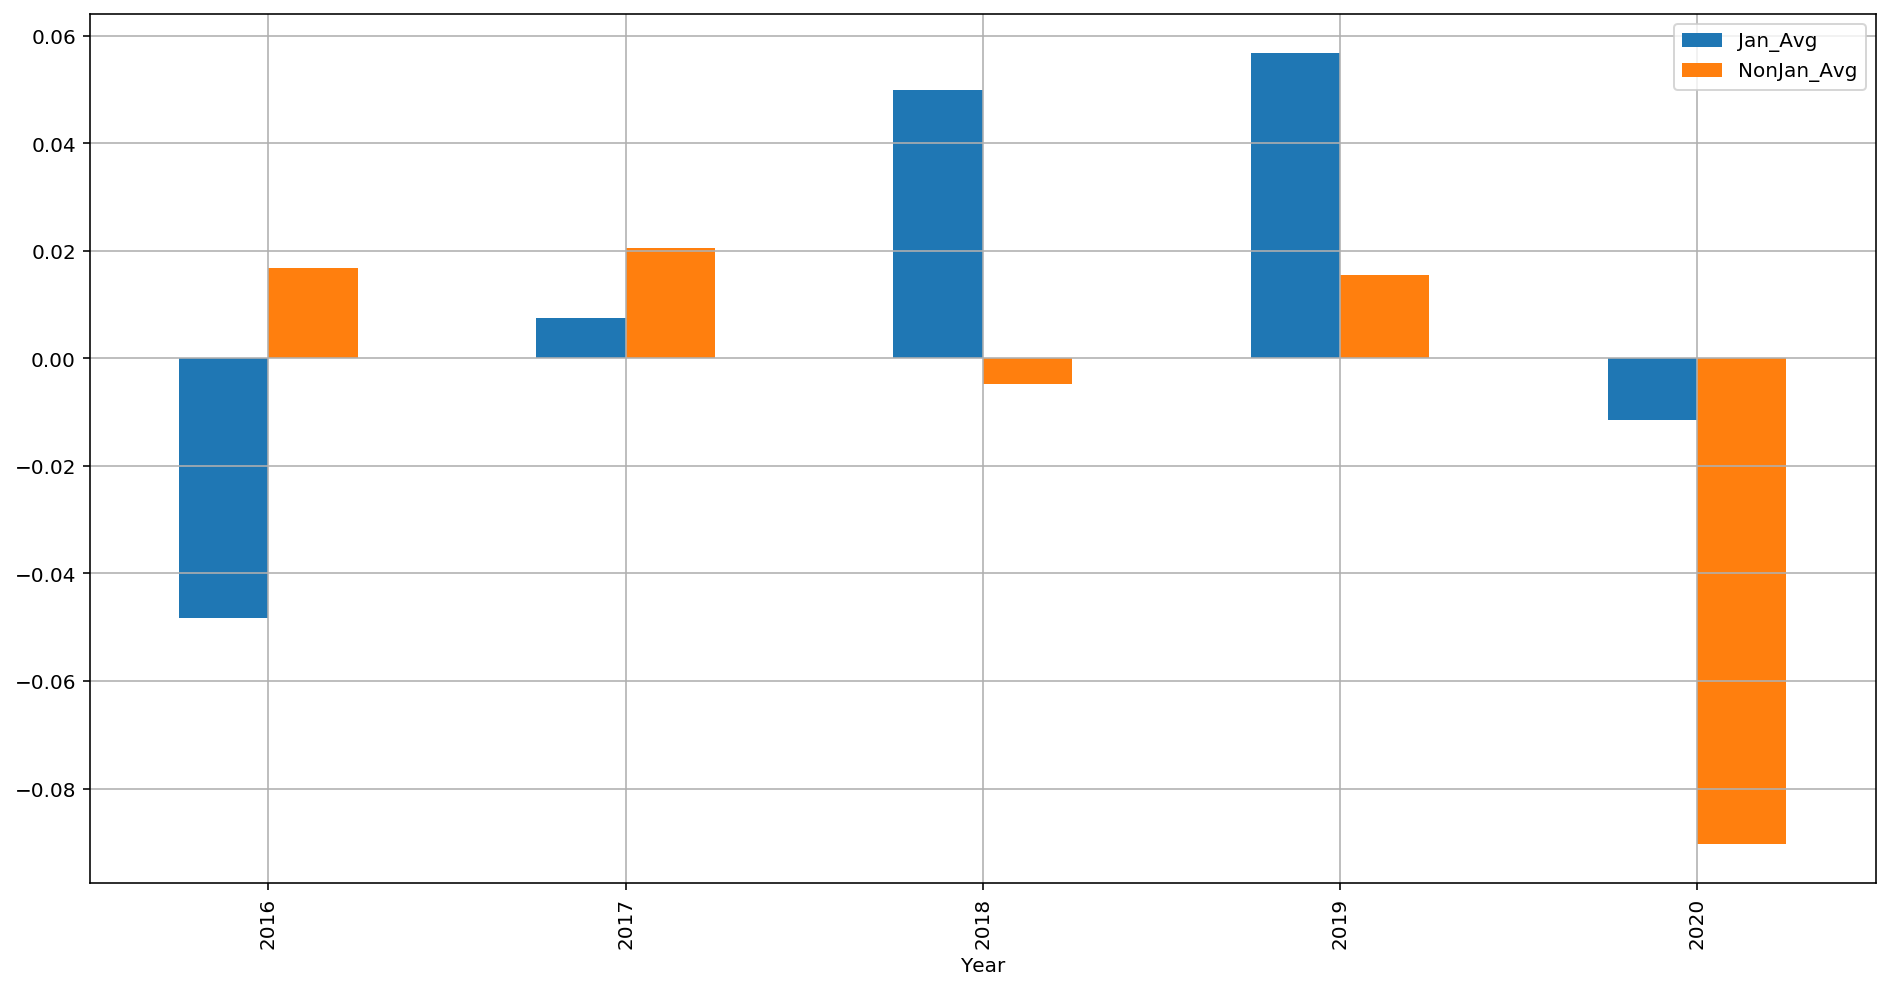

In [34]:
results_year.plot.bar(y=['Jan_Avg', 'NonJan_Avg'], figsize = (16,8) , grid=True);

### 8. Briefly explain whether the evidence is consistent with the January effect, and if not, name a couple of limitations of our dataset and/or approach.

- The evidence is not entirely consistent with the January effect. 
- We see for some years, the average jan return is higher than non-jan return (2018-2020). These three years had signficant p value of 5%
- The only stock that had significant January effect over the 5 year period was NKE.
- Limitations: different industries (i.e tech vs retail) may not be cross industry comparable when it comes to the January effect. Certain industries may exhibit this effect more than others. These calculations also do not take into account events that lead economic downturns/anomalies. For example in times of recession, people don't feel positive about investing which downplays any possible January effect. 

### The following questions apply to a random sample of fifteen stocks that your group will select by running the following code 

### Random Stock Selection 

In [35]:
np.random.seed (1000 + 1) 
ticker_list = ['AAPL', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO',
            'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'V', 'VZ', 'WMT', 'XOM']
stock_lst = np.random.choice(ticker_list,15,replace=False)
stock_lst

array(['WMT', 'PG', 'GS', 'MMM', 'INTC', 'JNJ', 'TRV', 'NKE', 'PFE', 'BA',
       'AAPL', 'AXP', 'MSFT', 'MRK', 'UNH'], dtype='<U4')

## PART II

### 1. Modify the returns_mon DataFrame to store only the monthly return for the fifteen stocks designated for your group. 

In [36]:
returns_mon_mod = returns_mon.copy()

for col in returns_mon_mod.columns:
    ticker = col[4:]
    if ticker not in stock_lst:
        returns_mon_mod.drop(col, axis=1, inplace=True)        

In [37]:
returns_mon_mod.head()

,RET_AAPL,RET_AXP,RET_BA,RET_GS,RET_INTC,RET_JNJ,RET_MMM,RET_MRK,RET_MSFT,RET_NKE,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_WMT
Date,,,,,,,,,,,,,,,
2015-04-30,-0.017426,-0.027759,-0.051596,0.022499,0.047501,0.000403,-0.056498,0.040780,0.157549,-0.008965,-0.016080,-0.035430,-0.067125,-0.055012,-0.036976
2015-05-29,0.044341,0.028888,-0.013481,0.051657,0.064227,0.016697,0.023358,0.022085,-0.030804,0.033690,0.032121,-0.014186,0.000099,0.076113,-0.043352
2015-06-30,-0.037938,-0.021673,-0.012892,0.012531,-0.124699,-0.027127,-0.030508,-0.059669,-0.059571,0.060584,-0.035739,-0.001915,-0.038947,0.019007,-0.046013
2015-07-31,-0.033481,-0.021590,0.038536,-0.017978,-0.049530,0.027826,-0.019370,0.035037,0.056151,0.064527,0.072744,-0.011725,0.093371,-0.004930,0.014695
2015-08-31,-0.068489,0.008640,-0.091882,-0.080282,-0.005990,-0.056565,-0.055781,-0.090657,-0.063951,-0.030579,-0.104813,-0.081881,-0.063911,-0.048090,-0.099358


### 2. For each stock, compute the cumulative return series over the entire sample (no reset), and store the series in a new DataFrame named sample_ret.

In [38]:
sample_ret = (1+returns_mon_mod[:]).cumprod()-1

In [39]:
sample_ret.head()

,RET_AAPL,RET_AXP,RET_BA,RET_GS,RET_INTC,RET_JNJ,RET_MMM,RET_MRK,RET_MSFT,RET_NKE,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_WMT
Date,,,,,,,,,,,,,,,
2015-04-30,-0.017426,-0.027759,-0.051596,0.022499,0.047501,0.000403,-0.056498,0.040780,0.157549,-0.008965,-0.016080,-0.035430,-0.067125,-0.055012,-0.036976
2015-05-29,0.026143,0.000327,-0.064382,0.075319,0.114778,0.017107,-0.034459,0.063765,0.121892,0.024424,0.015524,-0.049113,-0.067033,0.016914,-0.078725
2015-06-30,-0.012787,-0.021353,-0.076445,0.088793,-0.024233,-0.010484,-0.063916,0.000292,0.055059,0.086487,-0.020770,-0.050935,-0.103369,0.036243,-0.121116
2015-07-31,-0.045840,-0.042482,-0.040855,0.069219,-0.072563,0.017050,-0.082048,0.035339,0.114302,0.156595,0.050463,-0.062063,-0.019650,0.031134,-0.108200
2015-08-31,-0.111190,-0.034209,-0.128983,-0.016620,-0.078119,-0.040480,-0.133253,-0.058522,0.043041,0.121228,-0.059639,-0.138862,-0.082304,-0.018453,-0.196808


### 3a. Which stocks were the top three performers. What were their cumulative returns over the entire sample period?

In [40]:
sorted_sample=sample_ret.tail(1).iloc[:, np.argsort(sample_ret.loc[sample_ret.index[-1]])]
sorted_sample

,RET_BA,RET_GS,RET_MMM,RET_AXP,RET_TRV,RET_PFE,RET_MRK,RET_JNJ,RET_WMT,RET_NKE,RET_PG,RET_AAPL,RET_INTC,RET_UNH,RET_MSFT
Date,,,,,,,,,,,,,,,
2020-04-30,-0.444483,-0.326423,-0.157314,-0.149126,-0.096086,0.080301,0.438132,0.455651,0.504959,0.505763,0.51859,0.712606,0.75484,0.937837,2.728633


In [41]:
sorted_sample.iloc[:, [-3,-2,-1]]

,RET_INTC,RET_UNH,RET_MSFT
Date,,,
2020-04-30,0.75484,0.937837,2.728633


### 3b. Which stocks were the worst three performers. What were their cumulative returns over the entire sample period?

In [42]:
sorted_sample.iloc[:, [0,1,2]]

,RET_BA,RET_GS,RET_MMM
Date,,,
2020-04-30,-0.444483,-0.326423,-0.157314


### 3c. Create a line plot of the series for the stocks with the highest three and lowest three cumulative returns.

In [43]:
labels = sorted_sample.iloc[:, [-3,-2,-1]].columns
labels = labels.append(sorted_sample.iloc[:, [0,1,2]].columns)
labels

Index(['RET_INTC', 'RET_UNH', 'RET_MSFT', 'RET_BA', 'RET_GS', 'RET_MMM'], dtype='object')

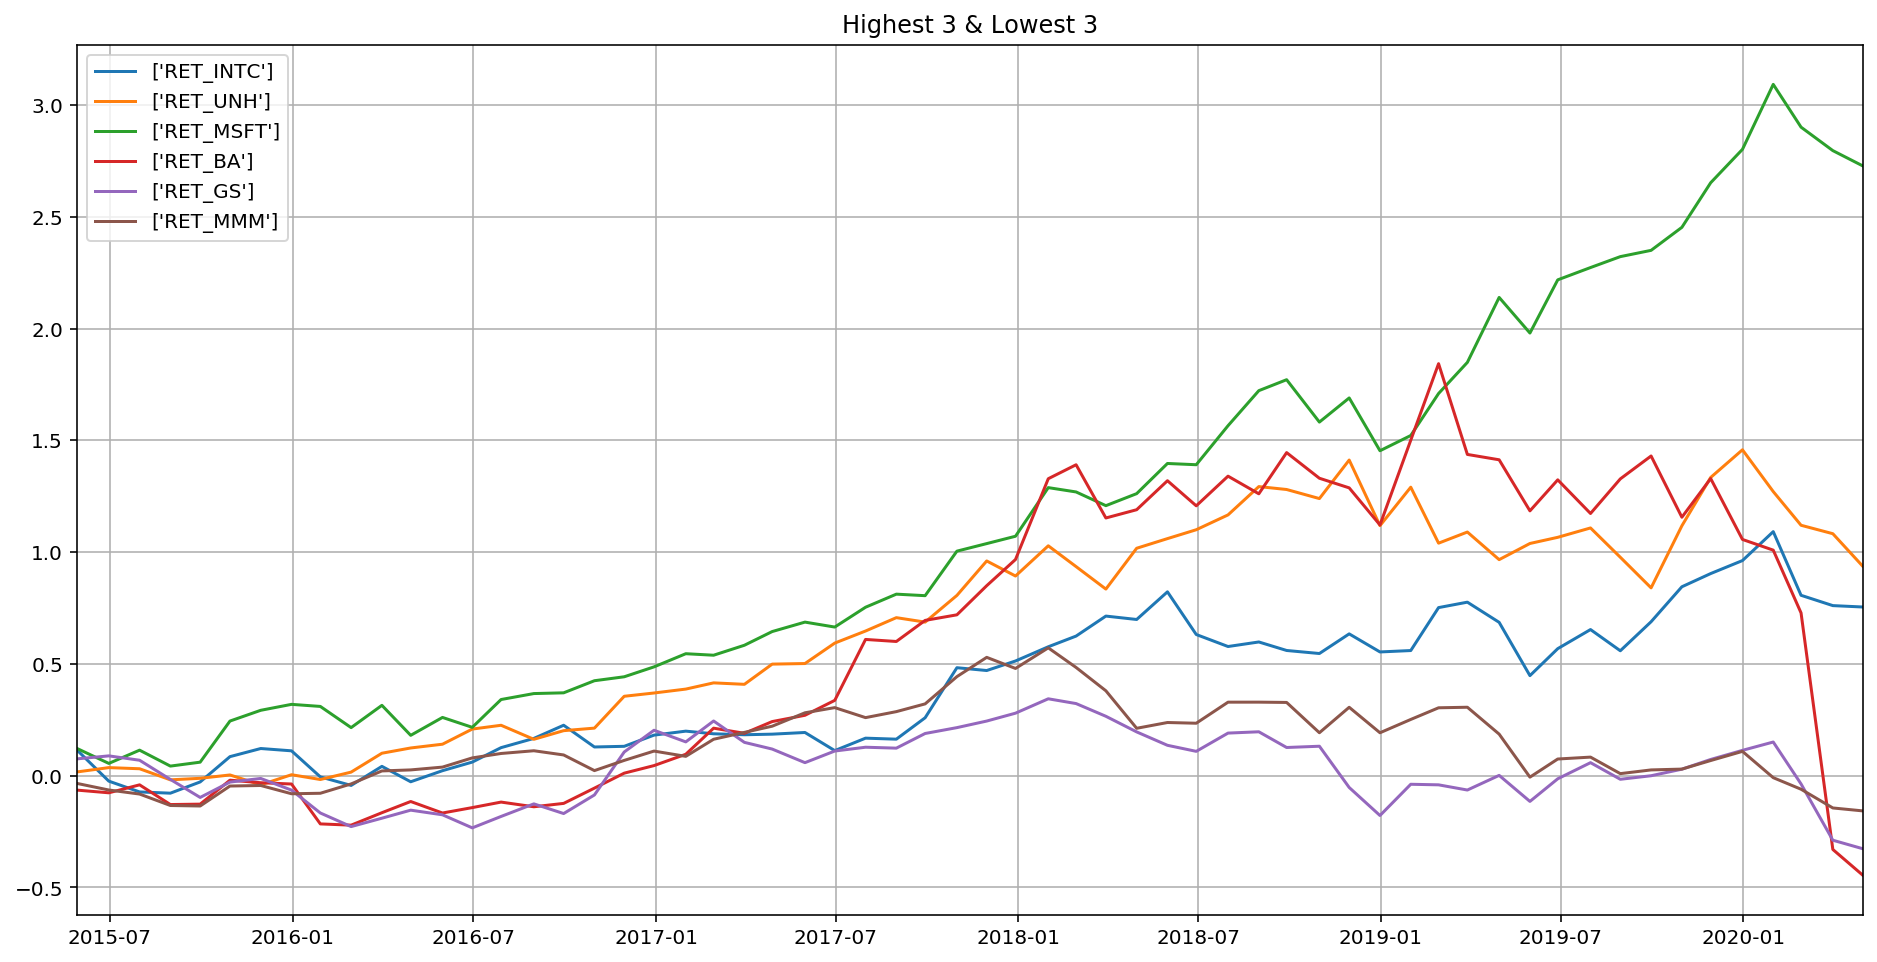

In [44]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)

for ticker in labels:
    ax.plot(sample_ret[ticker], label=[ticker])


ax.set_xlim(sample_ret.index[1], sample_ret.index[-1])       

ax.grid(True)

ax.set_title("Highest 3 & Lowest 3")

ax.legend(loc='best');

## PART III

### 1. Use the DataFrame returns_mon to create a new DataFrame named data_intial that only has the data from January 2013 to December 2017. In addition, create another DataFrame named data_post to store the 2018 and 2019 data.

In [45]:
data_initial = returns_mon['01/01/2013':'12/31/2017']
data_initial.head()

,RET_AAPL,RET_AXP,RET_BA,RET_CAT,RET_CSCO,RET_CVX,RET_DIS,RET_GS,RET_HD,RET_IBM,...,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_UTX,RET_V,RET_VZ,RET_WMT,RET_XOM,JAN_DUMMY
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-30,-0.017426,-0.027759,-0.051596,0.072301,0.057465,0.037990,0.028833,0.022499,-0.071855,0.055515,...,-0.016080,-0.035430,-0.067125,-0.055012,-0.035495,0.012953,0.027415,-0.036976,0.025972,0.0
2015-05-29,0.044341,0.028888,-0.013481,-0.018119,0.016512,-0.065426,0.015063,0.051657,0.040665,0.005593,...,0.032121,-0.014186,0.000099,0.076113,0.035091,0.040795,-0.020025,-0.043352,-0.016914,0.0
2015-06-30,-0.037938,-0.021673,-0.012892,-0.005877,-0.065198,-0.065497,0.033587,0.012531,0.002691,-0.042075,...,-0.035739,-0.001915,-0.038947,0.019007,-0.054727,-0.022529,-0.058945,-0.046013,-0.023754,0.0
2015-07-31,-0.033481,-0.021590,0.038536,-0.066587,0.042040,-0.086455,0.055865,-0.017978,0.051729,-0.004127,...,0.072744,-0.011725,0.093371,-0.004930,-0.100634,0.115082,0.015563,0.014695,-0.049144,0.0
2015-08-31,-0.068489,0.008640,-0.091882,-0.028247,-0.093623,-0.075930,-0.163696,-0.080282,-0.004882,-0.082799,...,-0.104813,-0.081881,-0.063911,-0.048090,-0.084214,-0.053478,-0.016811,-0.099358,-0.042107,0.0


In [46]:
data_post = returns_mon['01/01/2018':'12/31/2019']
data_post.head()

,RET_AAPL,RET_AXP,RET_BA,RET_CAT,RET_CSCO,RET_CVX,RET_DIS,RET_GS,RET_HD,RET_IBM,...,RET_PFE,RET_PG,RET_TRV,RET_UNH,RET_UTX,RET_V,RET_VZ,RET_WMT,RET_XOM,JAN_DUMMY
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,-0.010693,0.004428,0.183671,0.037097,0.088638,0.001277,0.010732,0.050255,0.058260,0.064856,...,0.022387,-0.054600,0.100097,0.071415,0.078661,0.085761,0.032635,0.076492,0.042829,1.0
2018-02-28,0.065961,-0.019197,0.026807,-0.051364,0.075105,-0.103420,-0.052035,-0.015886,-0.097318,-0.039472,...,-0.010684,-0.094940,-0.075628,-0.045889,-0.018439,-0.008699,-0.124510,-0.169163,-0.131870,0.0
2018-03-30,-0.059804,-0.044349,-0.099576,-0.048021,-0.043123,0.018765,-0.026721,-0.043014,-0.016671,-0.015521,...,-0.022842,0.009633,0.004190,-0.051961,-0.068495,-0.027376,0.001674,-0.005677,-0.015032,0.0
2018-04-30,-0.015134,0.060733,0.017175,-0.015682,0.040127,0.092644,-0.001096,-0.055217,0.036143,-0.056787,...,0.031070,-0.082395,-0.053699,0.099549,-0.046111,0.058921,0.043998,-0.005749,0.041224,0.0
2018-05-31,0.126742,-0.004567,0.059239,0.050978,-0.036326,0.002187,-0.008609,-0.050122,0.015008,-0.014462,...,-0.009034,0.011408,-0.023682,0.021386,0.043757,0.031422,-0.034635,-0.062987,0.053994,0.0


### 2. Create a DataFrame named rf_rate to store the risk free rate over the period from January 2013 to December 2019. The risk-free rate  is available in the ff_factors19.csv file on Blackboard.

In [47]:
#reading in data
rf_rate = pd.read_csv("ff_factors19.csv",
                     index_col='dateff',
                     usecols=['dateff', 'rf'],
                     parse_dates=True)

rf_rate.head()

,rf
dateff,
1926-07-31,0.0022
1926-08-31,0.0025
1926-09-30,0.0023
1926-10-30,0.0032
1926-11-30,0.0031


### 3a. Use the DataFrames data_initial and rf_rate, in conjunction with Scipy' s minimize() function to find the optimal portfolio (highest Sharpe ratio) from the universe of stocks comprised of all the stocks in your sample. (Assume there are no short-selling constraints).

In [ ]:
# more finance topics lecture material


### 3b. The weights of the stocks in the optimal portfolio are:

### 3c. The optimal portfolio return is:

### 3d. The optimal portfolio standard deviation is:

### 3e. The Sharpe Ratio the optimal portfolio is:

### 4a. What is the return of the Global Minimum Variance Portfolio (GMVP)

### 4b. What is the standard deviation of the Global Minimum Variance Portfolio (GMVP)

### 4c. What are the weights of the stocks in the Global Minimum Variance Portfolio (GMVP)

### 5. Use Scipy's minimize() function to solve for the efficient frontier. In addition, plot it, add to the plot the fifteen stocks, the GMVP, the optimal portfolio, as well as the Capital Allocation Line.

## PART IV

### 1. Create a DataFrame named weights with three columns: 1) TICKER; 2) Optimal_Weights and 3) Equal_Weights for each ticker.

In [ ]:
# creating df
weights = pd.DataFrame(columns = ['TICKER', 'Optimal_Weights', 'Equal_Weights'])
weights

### 2. Using the DataFrames data_post and weights, compute the two portfolio (Optimal and Equal-weighted) monthy returns over the period January 1st, 2018 and December 31st, 2019. Store the portfolio returns into a new DataFrame named port_returns. Label the two columns as 'Optimal Portfolio' and 'EW_Portfolio'

In [ ]:
# we have to do part three before this

### 3. In a single output, provide summary statistics on the two portfolios.

In [ ]:
# one function

### 4a. Compute the two-year cumulative return series for both portfolios and plot them in the same graph. 

### 4b. What was the two-year cumulative return for the best performer? What was the two-year cumulative return for the worst performer?